## libs used

In [22]:
import datetime,time,os,re
import io
import matplotlib.pyplot as plt
import matplotlib.image as img
import bs4
import requests
import pickle
import pandas

## vars

In [23]:
HOME_URL = "https://sbi.co.in/web/corporate-governance/directory-and-gross-emoluments-of-state-bank-of-india-staff"
FEILDS_URL = "https://sbi.co.in/web/corporate-governance/directory-and-gross-emoluments-of-state-bank-of-india-staff?p_p_id=salarydetails_INSTANCE_wUW5Jpkx9Xm1&p_p_lifecycle=2&p_p_state=normal&p_p_mode=view&p_p_resource_id=findDesignation&p_p_cacheability=cacheLevelPage"
SESSION_COOKIES = None # RequestsCookieJar
CAPTCH_URL = "https://sbi.co.in/web/corporate-governance/directory-and-gross-emoluments-of-state-bank-of-india-staff?p_p_id=salarydetails_INSTANCE_wUW5Jpkx9Xm1&p_p_lifecycle=2&p_p_state=normal&p_p_mode=view&p_p_resource_id=captcha&p_p_cacheability=cacheLevelPage"
DATA_URL = "https://sbi.co.in/web/corporate-governance/directory-and-gross-emoluments-of-state-bank-of-india-staff?p_p_id=salarydetails_INSTANCE_wUW5Jpkx9Xm1&p_p_lifecycle=1&p_p_state=normal&p_p_mode=view&_salarydetails_INSTANCE_wUW5Jpkx9Xm1_javax.portlet.action=searchRtiSalary"
PRIMARY_FIELD_URL = "https://sbi.co.in/web/corporate-governance/directory-and-gross-emoluments-of-state-bank-of-india-staff?p_p_id=salarydetails_INSTANCE_wUW5Jpkx9Xm1&p_p_lifecycle=2&p_p_state=normal&p_p_mode=view&p_p_resource_id=findDesignation&p_p_cacheability=cacheLevelPage"

GENERAL_HEADERS={
    "Accept"                    : "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "Accept-Encoding"           : "gzip, deflate",
    "Accept-Language"           : "en-US,en;q=0.9",
    "Cache-Control"             : "no-cache",
    "Pragma"                    : "no-cache",
    "Upgrade-Insecure-Requests" : "0",
    "User-Agent"                : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36"
                }
XHR_HEADERS = {
    "Accept"                    : "application/json, text/javascript, */*; q=0.01",
    "Accept-Encoding"           : "gzip, deflate, br",
    "Accept-Language"           : "en-US,en;q=0.9",
    "Cache-Control"             : "no-cache",
    "Connection"                : "keep-alive",
    "Content-Type"              : "application/x-www-form-urlencoded; charset=UTF-8",
    "Host"                      : "sbi.co.in",
    "Origin"                    : "https://sbi.co.in",
    "Pragma"                    : "no-cache",
    "Referer"                   : "https://sbi.co.in/web/corporate-governance/directory-and-gross-emoluments-of-state-bank-of-india-staff",
    "Sec-Fetch-Dest"            : "empty",
    "Sec-Fetch-Mode"            : "cors",
    "Sec-Fetch-Site"            : "same-origin",
    "User-Agent"                : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36",
    "X-Requested-With"          : "XMLHttpRequest"
    }
IMAGE_HEADERS = {
    "Accept"                    : "image/webp,image/apng,image/*,*/*;q=0.8",
    "Accept-Encoding"           : "gzip, deflate, br",
    "Accept-Language"           : "en-US,en;q=0.9",
    "Cache-Control"             : "no-cache",
    "Connection"                : "keep-alive",
    "Host"                      : "sbi.co.in",
    "Pragma"                    : "no-cache",
    "Referer"                   : "https://sbi.co.in/web/corporate-governance/directory-and-gross-emoluments-of-state-bank-of-india-staff",
    "Sec-Fetch-Dest"            : "image",
    "Sec-Fetch-Mode"            : "no-cors",
    "Sec-Fetch-Site"            : "same-origin",
    "User-Agent"                : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"
}
DATA_HEADERS = {
    "Accept" :"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "Accept-Encoding" :"gzip, deflate, br",
    "Accept-Language" :"en-GB,en-US;q=0.9,en;q=0.8,my;q=0.7",
    "Cache-Control" :"max-age=0",
    "Connection" :"keep-alive",
    "Content-Length" :"252",
    "Content-Type" :"application/x-www-form-urlencoded",
    "Host" :"sbi.co.in",
    "Origin" :"https://sbi.co.in",
    "Referer" :"https://sbi.co.in/web/corporate-governance/directory-and-gross-emoluments-of-state-bank-of-india-staff?p_p_id=salarydetails_INSTANCE_wUW5Jpkx9Xm1&p_p_lifecycle=1&p_p_state=normal&p_p_mode=view&_salarydetails_INSTANCE_wUW5Jpkx9Xm1_javax.portlet.action=searchRtiSalary",
    "Sec-Fetch-Dest" :"document",
    "Sec-Fetch-Mode" :"navigate",
    "Sec-Fetch-Site" :"same-origin",
    "Sec-Fetch-User" :"?1",
    "Upgrade-Insecure-Requests" :"1",
    "User-Agent" :"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.129 Safari/537.36"
}
PRIMARY_FIELD_HEADERS = {
    "Accept"           :"application/json, text/javascript, */*; q=0.01",
    "Accept-Encing"    :"gzip, deflate, br",
    "Accept-Language"  :"en-GB,en-US;q=0.9,en;q=0.8,my;q=0.7",
    "Connection"       :"keep-alive",
    "Content-Type"     :"application/x-www-form-urlencoded; charset=UTF-8",
    "Cookie"           :"JSESSIONID=0000Q72oIFpV-c_5ZQvcDZNDMhV:1doiub4uc; COOKIE_SUPPORT=true; TS01f781cf=0137799b1923cbf55033f3d3e5afe875b874d8c1f68161dd08cae11b9403ab0ceed8452d96b282c1fc123f0e962bbd9c177292fbebde35bf75ef759571b9376eff8d6bf26db55b102ca348c270f238271712f491e399bcc65626057c858cc5afe3d73852ed; LFR_SESSION_STATE_104=1605190143491; TS69e3fdbd029=08b90ded0cab2800afeda11f27a5db3f6d4222ad9bb8a19a99c5937f4e214df9e0b3250a2bbe8cd2f4162e0df6c413b4; TSd934945e027=08b90ded0cab20005209b3aa627c7c4da4eb32383f07c4c3e4c6a173865263f0c5fd22833d7a562d087efa0dd411300009f00f37136be274d1849d4f6eece1066ef02467b18602fe2fb497dc549e65e59b581beae666ea69e621ac3a53a63ae2",
    "Host"             :"sbi.co.in",
    "Origin"           :"https://sbi.co.in",
    "Referer"          :"https://sbi.co.in/web/corporate-governance/directory-and-gross-emoluments-of-state-bank-of-india-staff",
    "Sec-Fetch-Dest"   :"empty",
    "Sec-Fetch-Mode"   :"cors",
    "Sec-Fetch-Site"   :"same-origin",
    "User-Agent"       :"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.129 Safari/537.36",
    "X-Requested-With" :"XMLHttpRequest",
}

## Functions

In [24]:
def get_primary_fields():
    #requests index page
    index_page = requests.get(HOME_URL,headers=GENERAL_HEADERS)

    # parse page in DOM like object
    parser = bs4.BeautifulSoup(index_page.content,features="lxml")

    # updates session cookies
    SESSION_COOKIES = index_page.cookies

    #get all form elements from parserd html document
    form = parser.find_all("form")[2]

    #get all select elements from selected form element
    select = form.find_all("select")[0]

    #get all option elements from selected select element
    options = select.find_all("option")[1:]

    #get all field values from option elements
    return list(map(lambda x:x.get("value"),options)),SESSION_COOKIES

In [25]:
def select_primary_field(primary_field):
    global SESSION_COOKIES
        
    # data to be sent with post http request
    POST = {"_salarydetails_INSTANCE_wUW5Jpkx9Xm1_cadre":primary_field}

    # http post request(XHR)
    req_object = requests.post(FEILDS_URL,headers=XHR_HEADERS,cookies=SESSION_COOKIES,data=POST)

    # update cookies
    SESSION_COOKIES.update(req_object.cookies)

    # create python object from request content
    response = eval(req_object.content)

    return list(map(lambda x:x["designation"],response))


In [26]:
def get_Captcha():
    # we have to modify this variable otherwise we can use these globals directly
    global SESSION_COOKIES
    
    # required parameter
    parameter = {"t" : int(time.time()*1000)}
    
    req_object = requests.get(CAPTCH_URL,parameter,headers=IMAGE_HEADERS,cookies=SESSION_COOKIES)
    
    #update cookies associated with capcha
    SESSION_COOKIES.update(req_object.cookies)
    
    # here req_object.content returns 
    # b'\x89PNG\r\n\x1a\n\.......\x00\x00IEND\xaeB`\x82'
    # these are png file in raw bytes
    # we will return a file object here it is faster than second method
    
    return io.BytesIO(req_object.content)
    
    # save
    with open("capcha.png","wb") as file:
        file.write(req_object.content)
        
    # return file object
    return open("capcha.png","rb")

In [27]:
def get_data(PRIMARY_FILED,SECONDERY_FIELD,CAPTCHA_VALUE):
    print(PRIMARY_FILED,SECONDERY_FIELD,CAPTCHA_VALUE)
    POST = {
        "_salarydetails_INSTANCE_wUW5Jpkx9Xm1_formDate": int(time.time()*1000),
        "_salarydetails_INSTANCE_wUW5Jpkx9Xm1_cadre": PRIMARY_FILED,
        "_salarydetails_INSTANCE_wUW5Jpkx9Xm1_designation": SECONDERY_FIELD,
        "_salarydetails_INSTANCE_wUW5Jpkx9Xm1_captchaText": CAPTCHA_VALUE,
        "p_auth":""
    }
    
    req_object = requests.post(DATA_URL,headers=DATA_HEADERS,cookies=SESSION_COOKIES,data=POST)
    SESSION_COOKIES.update(req_object.cookies)
    
    # if we got any data or failed
    if re.findall(b"Captcha Validation Failed",req_object.content)==[]:    
        # pandas read_html function we parse html table and will return dataframe
        return pandas.read_html(req_object.content)
    else:
        # failed
        return False

## Action Starts Here

In [17]:
# get index page with form
pfs,SESSION_COOKIES = get_primary_fields()
pfs

['Board of Director',
 'Clerical',
 'Contractual',
 'Officers Cadre',
 'Specialist cadre',
 'Sub-Staff',
 'UTCS']

In [18]:
# get list of  primary fields
sfs = select_primary_field(pfs[2])
sfs

['Def. Bk Adv-Lower',
 'HEAD (LEGAL) & CGM',
 'Dy Vice President',
 'Zonal Head-Sales',
 'SENIOR MGR(CONTRACT)',
 'Chl Manager SUPVR-AC',
 'VICE PRESIDENT',
 'Project Manager',
 'Chief Mkting Officer',
 'MT-ExecutiveGrade S4',
 'ARCHITECT',
 'RESOLUTION OFFICER',
 'Executive',
 'Senior Executive',
 'INNOVATION SPL/STGST',
 'Asst VicePresdnt(MT)',
 'Def. Bk Adv-Higher',
 'POST-DOCTRLRES.FELOW',
 'InvestmentCounsellor',
 'Engineer(Contractual',
 'INTERNAL OMBUDSMAN',
 'Sr Adv/Conslt TEGSS2',
 'Contractual DGM',
 'Sr Adv/Conslt TEGSS1',
 'Chartered Acct(Cont)',
 'Coordinator(Proj)VI',
 'HEAD',
 'Vice President(MT)',
 'GRPCF ECO ADVSR',
 'FIRE OFFICER',
 'SUPPORT OFFICER',
 'Analyst(Contarctual)',
 'IT Spl.Off.Tech Sup',
 'RELATIONSHIP MANAGER',
 'Officer (Mktg&Rec)FS',
 'Executive Grade B',
 'Support Officer-AC',
 'MANAGER (CONTRACT)',
 'Contractual-CGM',
 'RISK OFFICER',
 'DEVELOPER',
 'Management Trainee',
 'Advisor',
 'Asst Vice President',
 'TechnicalConsut/Lead',
 'DEAN',
 'FACULTY',

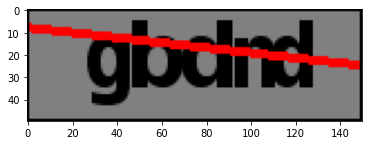

In [19]:
#file object
png = get_Captcha()

#print png fle
plt.imshow(img.imread(png))

In [20]:
dataframe = get_data(pfs[2],sfs[4],"gbdnd")

Contractual SENIOR MGR(CONTRACT) gbdnd


In [21]:
dataframe[0]

,Name,Designation,Branch/Office Name,Circle,Gross Salary,Status
0,Meghna Chettri,SENIOR MGR(CONTRACT),CORPORATE CENTR,SBI - CC - Mumbai,108338.70,Active
1,Deepika Rajeeva Shetty,SENIOR MGR(CONTRACT),CORPORATE CENTR,SBI - CC - Mumbai,67666.00,Active
2,SWEETHY VIJAYKUMAR NAIR,SENIOR MGR(CONTRACT),CORPORATE CENTR,SBI - CC - Mumbai,69166.67,Active
3,Harshit Bhatia,SENIOR MGR(CONTRACT),CORPORATE CENTR,SBI - CC - Mumbai,151000.00,Active
4,Anoop Kumar Yadav,SENIOR MGR(CONTRACT),CORPORATE CENTR,SBI - CC - Mumbai,69600.00,Active
5,Nirupam Mohanty,SENIOR MGR(CONTRACT),LHO KOLKATTA,SBI - Kolkata,152250.00,Active
6,Rishi Dhaddha,SENIOR MGR(CONTRACT),MUMBAIMETROA&BU,SBI - Mumbai Metro,438417.00,Active
7,Ujjwal Kumar Nandi,SENIOR MGR(CONTRACT),CORPORATE CENTR,SBI - CC - Mumbai,156283.00,Active


#### to get all data we will iterate over all primary_fields and corresponding secondary_fields

## combine all csv in one dataset

In [63]:
database = pandas.DataFrame()
for file in os.listdir("data"):
    csv = pandas.read_csv("/".join(["data",file]),index_col=0)
    database = pandas.concat([database,csv],ignore_index=True)
database

,Name,Designation,Branch/Office Name,Circle,Gross Salary,Status
0,Viswanath Gundimeda,Cust Rel.Exe. (CRE),L H O AMRAVATI,SBI - Amaravati,28833.00,Active
1,PARITOSH KUMAR MONDAL,Cust Rel.Exe. (CRE),LHO KOLKATTA,SBI - Kolkata,17833.00,Active
2,ASHISH GUSAIN,Cust Rel.Exe. (CRE),LHO NEW DELHI,SBI - New Delhi,26750.00,Active
3,SAHIL AHUJA,Cust Rel.Exe. (CRE),LHO NEW DELHI,SBI - New Delhi,26166.00,Active
4,AMIT RANJAN,Cust Rel.Exe. (CRE),LHO NEW DELHI,SBI - New Delhi,27916.00,Active
...,...,...,...,...,...,...
247657,Ajit Kumar Sahoo,Asst. Gen. Manager,ZONAL INSPECTIO,SBI - ZIO-I&A HYD,139780.18,Active
247658,Bhuvaneswari M,Asst. Gen. Manager,SIRUTHOZIL THEN,SBI - Chennai,126176.49,Active
247659,Umesh C,Asst. Gen. Manager,SME CITY CREDIT,SBI-Thiruvananthpurm,132663.96,Active
247660,Anil Kumar P,Asst. Gen. Manager,INSP AND MGMT D,SBI - ZIO-I&A HYD,132663.96,Active


In [64]:
database.to_csv("sbi_employee_dataset.csv")